<a href="https://colab.research.google.com/github/nathencinoza/pandas-movies-database/blob/main/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Orga 2/notificacion-casos-vih-sexo-jurisdiccion-2010-2019-argentina_1-1.csv', encoding = 'latin-1')
df

,id_sexo,sexo,id_jurisdiccion,jurisdiccion,anio,casos_vih
0,3,ambos_sexos,200,ARG,2010,7188
1,3,ambos_sexos,200,ARG,2011,7171
2,3,ambos_sexos,200,ARG,2012,7206
3,3,ambos_sexos,200,ARG,2013,7218
4,3,ambos_sexos,200,ARG,2014,6522
...,...,...,...,...,...,...
745,1,varones,90,Tucumán,2015,204
746,1,varones,90,Tucumán,2016,191
747,1,varones,90,Tucumán,2017,221
748,1,varones,90,Tucumán,2018,221


In [ ]:
df = df[df['jurisdiccion'] != 'ARG']
df = df[df['sexo'] == 'ambos_sexos']
df['casos_por_jur'] = df.groupby('jurisdiccion')['casos_vih'].transform('sum')
df = df.sort_values('casos_por_jur', ascending = False)
df['jurisdiccion'].unique()

array(['Buenos Aires', 'CABA', 'Córdoba', 'Santa Fe', 'Salta', 'Mendoza',
       'Tucumán', 'Jujuy', 'Neuquén', 'Entre Ríos', 'Río Negro',
       'Misiones', 'Chubut', 'San Juan', 'Chaco', 'Corrientes', 'Formosa',
       'Santa Cruz', 'San Luis', 'La Pampa', 'Santiago del Estero',
       'Tierra del Fuego', 'La Rioja', 'Catamarca'], dtype=object)

In [ ]:
lista = list(['Entre Ríos',
 'Río Negro',
 'Misiones',
 'Chubut',
 'San Juan',
 'Chaco',
 'Corrientes',
 'Formosa',
 'Santa Cruz',
 'San Luis',
 'La Pampa',
 'Santiago del Estero',
 'Tierra del Fuego',
 'La Rioja',
 'Catamarca'])
df = df[df['jurisdiccion'].isin(lista)]

In [ ]:
matriz = df.pivot_table(index='anio', columns = 'jurisdiccion', values = 'casos_vih')
matriz

jurisdiccion,Catamarca,Chaco,Chubut,Corrientes,Entre Ríos,Formosa,La Pampa,La Rioja,Misiones,Río Negro,San Juan,San Luis,Santa Cruz,Santiago del Estero,Tierra del Fuego
anio,,,,,,,,,,,,,,,
2010,19,91,100,89,165,39,39,63,135,91,58,44,62,57,33
2011,36,95,136,79,182,33,55,53,128,97,92,48,61,85,49
2012,44,110,114,90,160,49,40,35,190,109,102,70,61,49,34
2013,38,142,136,109,182,73,74,66,120,130,97,91,46,35,43
2014,44,47,103,103,128,40,54,62,95,101,91,57,74,68,35
2015,68,22,112,117,144,70,66,44,36,124,95,74,71,86,41
2016,52,78,121,110,120,74,69,15,149,139,97,80,67,39,44
2017,10,23,55,35,56,78,73,7,117,111,88,48,93,22,36
2018,5,166,81,53,132,90,50,4,124,134,108,37,96,23,43


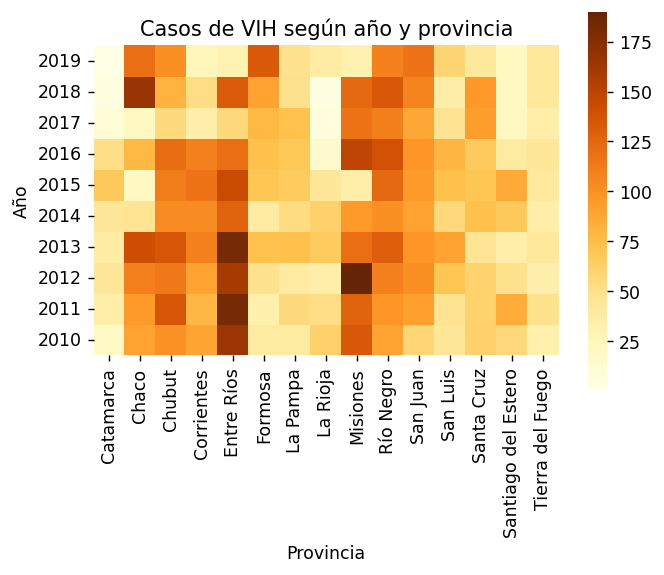

In [ ]:
plt.figure(dpi = 125)
fig = sns.heatmap(matriz, cmap = sns.color_palette("YlOrBr", as_cmap=True), square = True)
fig.invert_yaxis()
plt.title("Casos de VIH según año y provincia")
plt.ylabel("Año")
plt.xlabel("Provincia")
plt.show()